In [ ]:
import pandas
pd = pandas
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [ ]:
train = pd.read_csv('/content/train.csv')


In [ ]:
print(train.head())

   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN    

In [ ]:

print(train.describe())


                 ID  hla_match_c_high  hla_high_res_8  hla_low_res_6  \
count  24493.000000      20559.000000    19534.000000   21689.000000   
mean   12246.000000          1.766380        6.885482       5.149108   
std     7070.664408          0.430551        1.558314       1.204776   
min        0.000000          0.000000        2.000000       2.000000   
25%     6123.000000          2.000000        6.000000       4.000000   
50%    12246.000000          2.000000        8.000000       6.000000   
75%    18369.000000          2.000000        8.000000       6.000000   
max    24492.000000          2.000000        8.000000       6.000000   

       hla_high_res_6  hla_high_res_10  hla_match_dqb1_high    hla_nmdp_6  \
count    19992.000000     18404.000000         20052.000000  20891.000000   
mean         5.115146         8.629428             1.739078      5.167249   
std          1.211035         1.896363             0.446134      1.200200   
min          0.000000         3.000000     

In [ ]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24493 entries, 0 to 24492
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      24493 non-null  int64  
 1   dri_score               24366 non-null  object 
 2   psych_disturb           22705 non-null  object 
 3   cyto_score              17638 non-null  object 
 4   diabetes                22654 non-null  object 
 5   hla_match_c_high        20559 non-null  float64
 6   hla_high_res_8          19534 non-null  float64
 7   tbi_status              24493 non-null  object 
 8   arrhythmia              22588 non-null  object 
 9   hla_low_res_6           21689 non-null  float64
 10  graft_type              24493 non-null  object 
 11  vent_hist               24273 non-null  object 
 12  renal_issue             22832 non-null  object 
 13  pulm_severe             22656 non-null  object 
 14  prim_disease_hct        24493 non-null

In [ ]:
print(train.shape)


(24493, 60)


In [ ]:
print(train.columns)


Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [ ]:
missing_values =(train.isnull().sum())
missing_percentage = (missing_values / len(train)) * 100


In [ ]:
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])


Missing Values in Each Column:
 dri_score                   127
psych_disturb              1788
cyto_score                 6855
diabetes                   1839
hla_match_c_high           3934
hla_high_res_8             4959
arrhythmia                 1905
hla_low_res_6              2804
vent_hist                   220
renal_issue                1661
pulm_severe                1837
hla_high_res_6             4501
cmv_status                  541
hla_high_res_10            6089
hla_match_dqb1_high        4441
tce_imm_match              9451
hla_nmdp_6                 3602
hla_match_c_low            2396
rituximab                  1860
hla_match_drb1_low         2271
hla_match_dqb1_low         3585
cyto_score_detail         10128
conditioning_intensity     4102
ethnicity                   500
obesity                    1528
mrd_hct                   14189
in_vivo_tcd                 191
tce_match                 16131
hla_match_a_high           3672
hepatic_severe             1619
donor_ag

In [ ]:

train.fillna(train.mean(numeric_only=True), inplace=True)


In [ ]:
threshold = 50
cols_to_drop = missing_percentage[missing_percentage > threshold].index
train.drop(columns=cols_to_drop, inplace=True)


In [ ]:
print("Missing Values :\n", train.isnull().sum().sum())


Missing Values :
 68675


In [ ]:
print(train.isnull().sum())  # missing values per column


ID                            0
dri_score                   127
psych_disturb              1788
cyto_score                 6855
diabetes                   1839
hla_match_c_high              0
hla_high_res_8                0
tbi_status                    0
arrhythmia                 1905
hla_low_res_6                 0
graft_type                    0
vent_hist                   220
renal_issue                1661
pulm_severe                1837
prim_disease_hct              0
hla_high_res_6                0
cmv_status                  541
hla_high_res_10               0
hla_match_dqb1_high           0
tce_imm_match              9451
hla_nmdp_6                    0
hla_match_c_low               0
rituximab                  1860
hla_match_drb1_low            0
hla_match_dqb1_low            0
prod_type                     0
cyto_score_detail         10128
conditioning_intensity     4102
ethnicity                   500
year_hct                      0
obesity                    1528
in_vivo_

In [ ]:
print("Missing Values :\n",train.isnull().sum().sum())


Missing Values :
 68675


In [ ]:
train.dropna(inplace=True)


In [ ]:
print("Missing Values after handling :\n",train.isnull().sum().sum())


Missing Values after handling :
 0


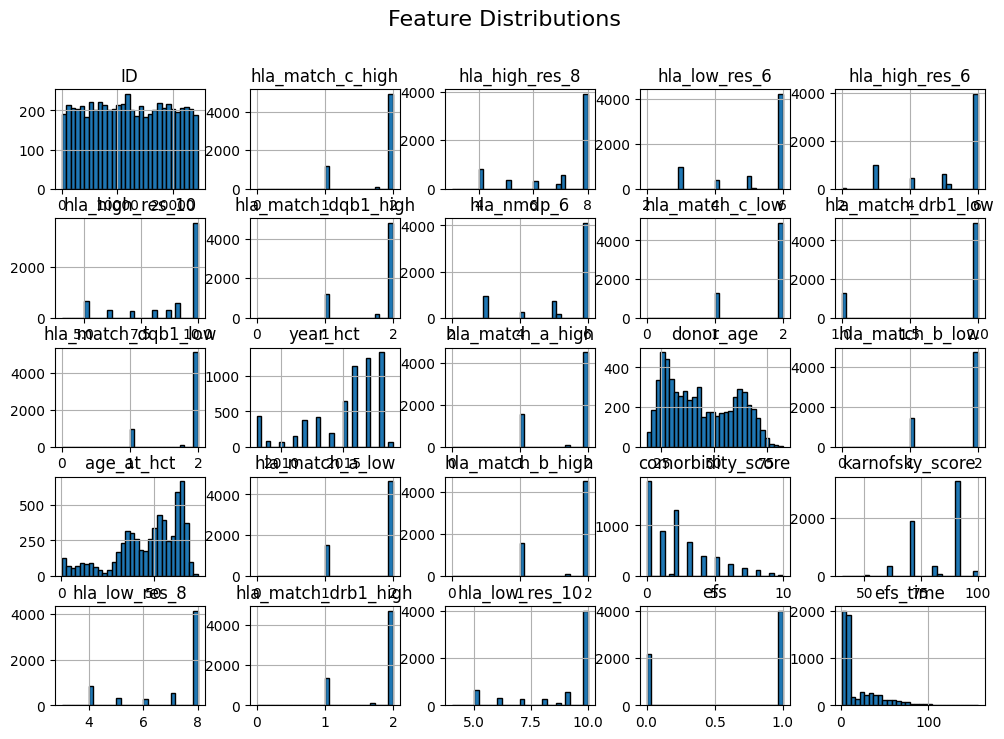

In [ ]:
#histogram
train.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


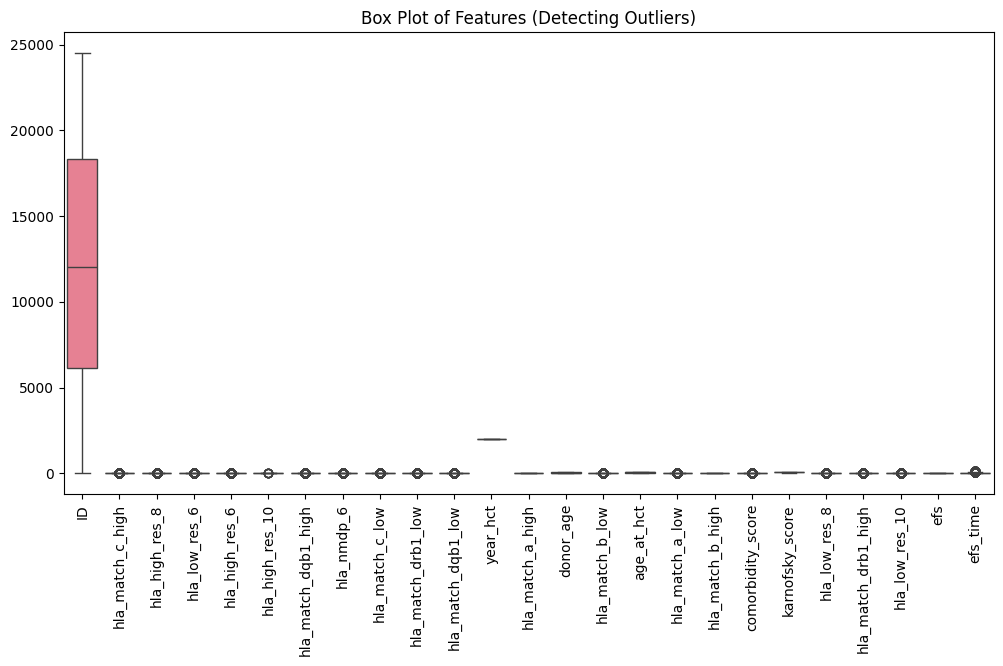

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.title("Box Plot of Features (Detecting Outliers)")
plt.show()


In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'in_vivo_tcd', 'hepatic_severe', 'prior_tumor',
       'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose',
       'cardiac', 'pulm_moderate'],
      dtype='object')
Numerical Columns: Index(['ID', 'hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6',
       'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high',
       'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age',
       'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high',
       'comorbidity_score'

In [ ]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6166 entries, 1 to 24489
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      6166 non-null   int64  
 1   dri_score               6166 non-null   int64  
 2   psych_disturb           6166 non-null   int64  
 3   cyto_score              6166 non-null   int64  
 4   diabetes                6166 non-null   int64  
 5   hla_match_c_high        6166 non-null   float64
 6   hla_high_res_8          6166 non-null   float64
 7   tbi_status              6166 non-null   int64  
 8   arrhythmia              6166 non-null   int64  
 9   hla_low_res_6           6166 non-null   float64
 10  graft_type              6166 non-null   int64  
 11  vent_hist               6166 non-null   int64  
 12  renal_issue             6166 non-null   int64  
 13  pulm_severe             6166 non-null   int64  
 14  prim_disease_hct        6166 non-null   int6

In [ ]:
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])


In [ ]:
print("Final Processed Data:\n", train.head())
print("Missing Values:", train.isnull().sum().sum())


Final Processed Data:
           ID  dri_score  psych_disturb  cyto_score  diabetes  \
1  -1.734641          2              0           1         0   
3  -1.734357          0              0           1         0   
5  -1.734072          0              0           5         2   
10 -1.733361          2              0           1         2   
22 -1.731654          7              2           5         0   

    hla_match_c_high  hla_high_res_8  tbi_status  arrhythmia  hla_low_res_6  \
1           0.490615        0.645185           6           0       0.610486   
3           0.490615        0.645185           0           0       0.610486   
5           0.490615       -0.042289           1           0      -1.161586   
10          0.490615        0.645185           0           0       0.610486   
22          0.490615        0.645185           0           0       0.610486   

    ...  tce_div_match  donor_related  melphalan_dose  hla_low_res_8  cardiac  \
1   ...              3              